In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import chess
import chess.svg

In [2]:
import os
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk("Local/imgs_rafel/"):
    for file in f:
        if '.JPG' in file:
            files.append(os.path.join(r, file))

In [3]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

files.sort(key=natural_keys)

In [8]:
img = cv2.imread("Local/imgs_rafel/DSC_0014.JPG", 0)

In [17]:
aux = np.zeros((400, 400), dtype = np.float32)
pts_aux = np.float32([[0,0],[aux.shape[1], 0],[aux.shape[1],aux.shape[0]],[0,aux.shape[0]]])

In [18]:
points = []
ix,iy = -1,-1

def get_points(event,x,y,flags,param):
    global ix,iy,drawing,mode, points

    if event == cv2.EVENT_LBUTTONDOWN:
        ix,iy = x,y
        #print(x, y)
        points.append([x, y])

img_r = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

#descomentar abaixo para clicar na tela

# cv2.imshow("click", img_r)
# cv2.setMouseCallback('click', get_points)

# while (1):
#     k = cv2.waitKey(1) & 0xFF
#     if k == ord('q') or k == 27:
#         break
        
# cv2.destroyAllWindows()


# pts1 = np.float32(points[:4])

In [19]:
pts1 = np.array([[514., 177.],
       [931., 165.],
       [944., 577.],
       [527., 591.]], dtype = np.float32)

In [20]:
M = cv2.getPerspectiveTransform(pts1, pts_aux)

In [21]:
perspectiva = cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT)

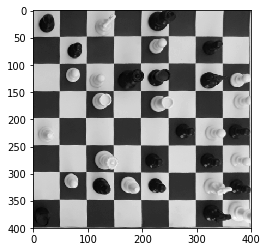

In [22]:
plt.imshow(perspectiva, cmap = "gray")

In [23]:
perspectiva = []
lst_geral = []

for path in files:
    img = cv2.imread(path, 0)
    M = cv2.getPerspectiveTransform(pts1, pts_aux)
    img_r = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
    perspectiva.append(cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT))
    lst = []
    for i in range(8):
        for j in range(8):
            lst.append(perspectiva[-1][perspectiva[-1].shape[1]*i//8:perspectiva[-1].shape[1]*(i+1)//8, perspectiva[-1].shape[0]*j//8:perspectiva[-1].shape[0]*(j+1)//8])
    array = np.array(lst).reshape(8, 8, 50, -1)
    lst_geral.append(array)

In [28]:
array_imgs = np.array(perspectiva)
array_geral = np.array(lst_geral)

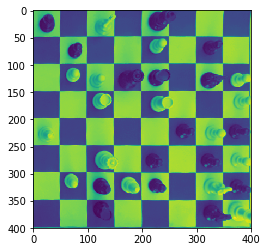

In [27]:
plt.imshow(perspectiva[2])

In [56]:
for x in list(range(8))[::-1]:
    for y in range(8):
#         if (x, y) == (0, 0):
#             plt.imshow(array_geral[(7-x)*8+y+ 0][x,y])
        cv2.imwrite("Labels/r/{}.png".format((7-x)*8+y), array_geral[(7-x)*8+y+ 0][x,y])

In [57]:
for x in list(range(8))[::-1]:
    for y in range(8):
#         if (x, y) == (0, 0):
#             plt.imshow(array_geral[(7-x)*8+y+ 0][x,y])
        cv2.imwrite("Labels/n/{}.png".format((7-x)*8+y), array_geral[(7-x)*8+y+ 64][x,y])

In [6]:
%%time
for file_path in files:
    img = cv2.imread(file_path, 1)

CPU times: user 5.32 s, sys: 43.1 ms, total: 5.36 s
Wall time: 5.36 s


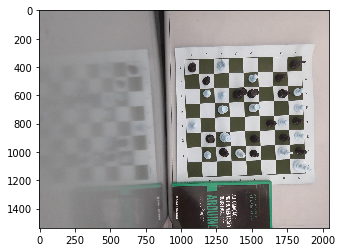

In [7]:
plt.imshow(img)